In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import sys
sys.path.append('../')
from exp.exp_utils import read_nori_image
import matplotlib.pyplot as plt
import torch
from data.datasets.veri776 import VeRi776Nori
from data.samplers import SimilarIdentitySampler

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:

sim_mat = torch.load('../exp/sim_mat.pth').numpy()
dataset = VeRi776Nori()
batch_size = 64
num_instances = 4
vids_per_batch = batch_size // num_instances
sampler = SimilarIdentitySampler(dataset.train, 64, 4, sim_mat)
final_idxs = [idx for idx in sampler]

=> VeRi776 loaded
Dataset statistics:
  ----------------------------------------
  subset   | # ids | # images | # cameras
  ----------------------------------------
  train    |   576 |    37778 |        20
  query    |   200 |     1678 |        19
  gallery  |   200 |    11579 |        19
  ----------------------------------------


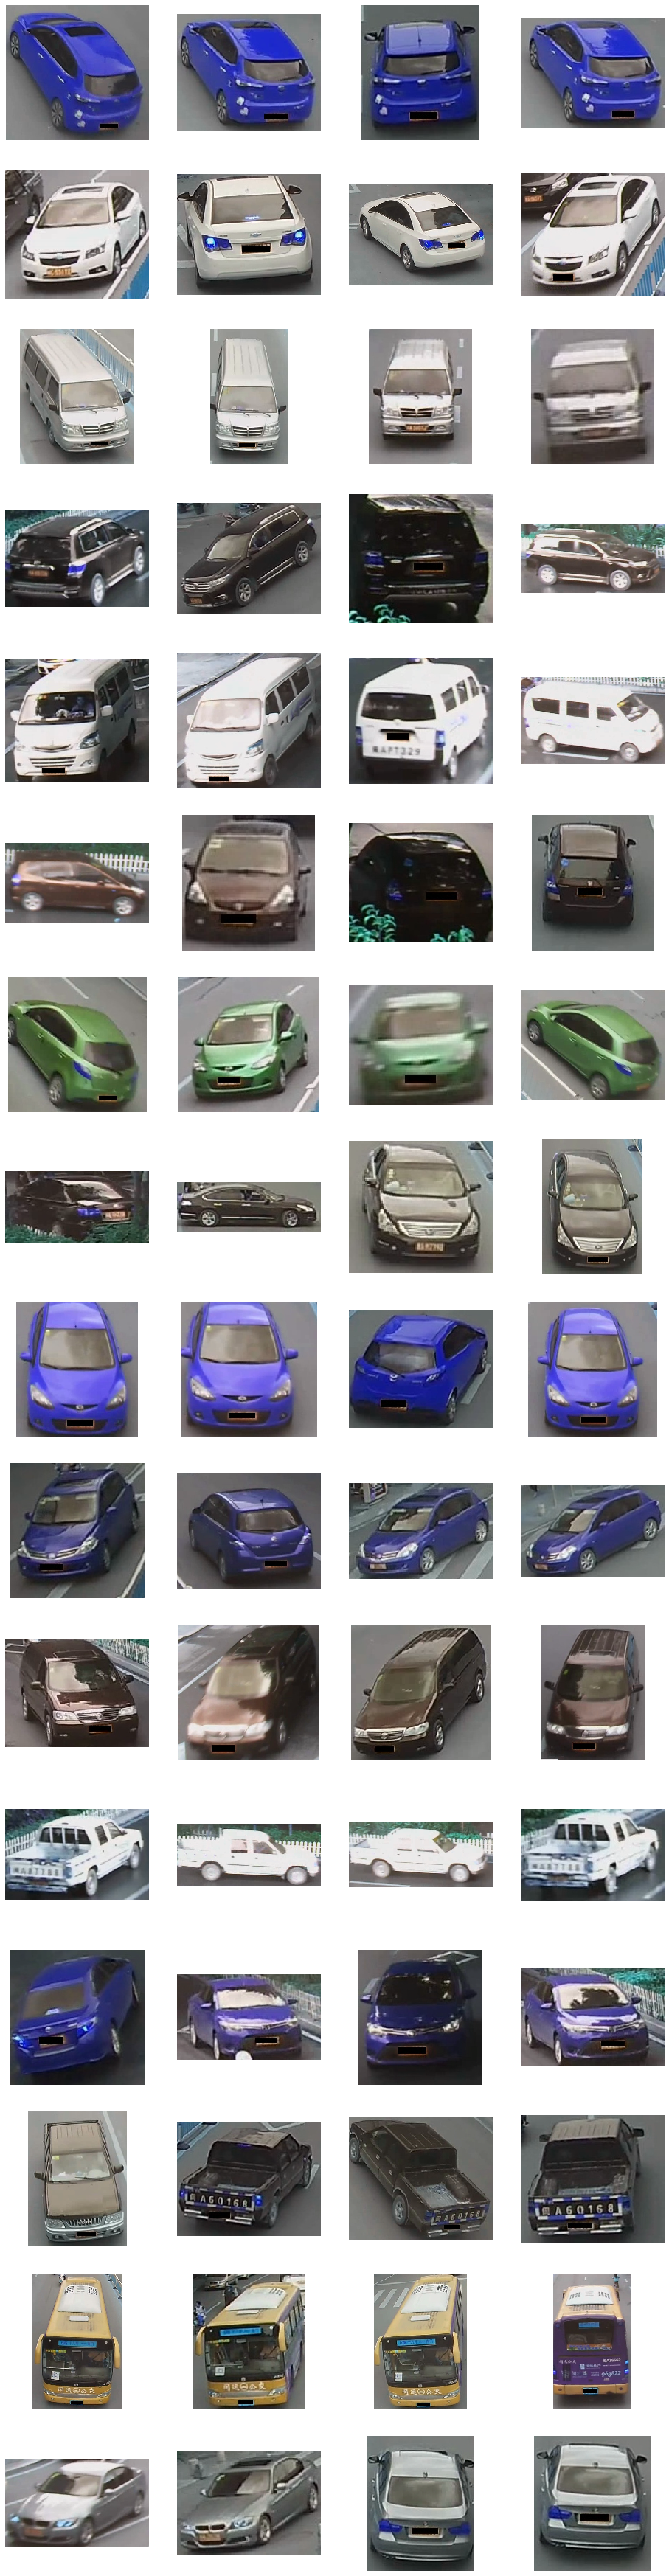

In [4]:
batch = 3
start_idx = batch * batch_size
end_idx = (batch + 1) * batch_size
fig, axs = plt.subplots(vids_per_batch, num_instances, figsize=(num_instances*4, vids_per_batch*4))
for i, idx in enumerate(final_idxs):
    if start_idx <= i < end_idx:
        data = dataset.train[idx]
        img = read_nori_image(data[0])
        ax = axs[(i - start_idx) // num_instances, i % num_instances]
        ax.imshow(img)
        ax.axis('off')
        if i == end_idx - 1: 
            break  
plt.show()


可以看出，采样的结果不是很难。一是由于不同车辆的概率分布没有拉开，
导致采到了很多不相似的车型。而不相似的车型之间并不难。

需要调整采样分布，使得概率相近的具有绝对优势。

